# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

In [421]:
import scipy as sp
import scipy.special as sps
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix


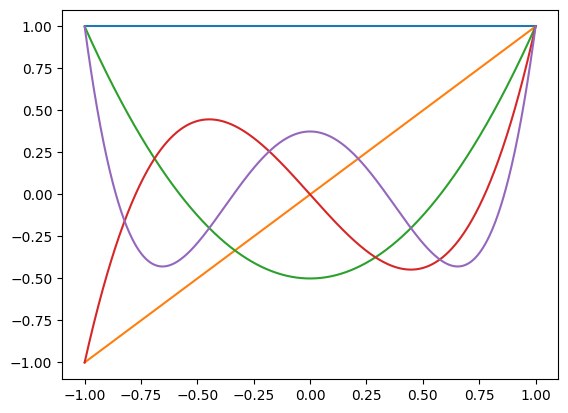

In [422]:
arr = np.linspace(-1,1,1000)
leg0 = sps.legendre(0)
leg1 = sps.legendre(1)
leg2 = sps.legendre(2)
leg3 = sps.legendre(3)
leg4 = sps.legendre(4)

plt.plot(arr,leg0(arr))
plt.plot(arr,leg1(arr))
plt.plot(arr,leg2(arr))
plt.plot(arr,leg3(arr))
plt.plot(arr,leg4(arr))
#uvedomuju si pofidernost kodu

2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
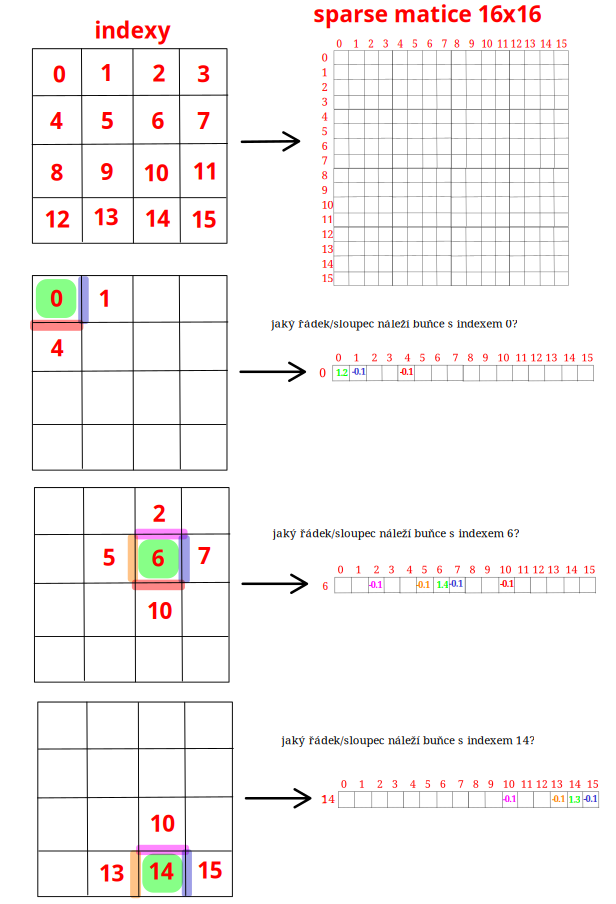


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


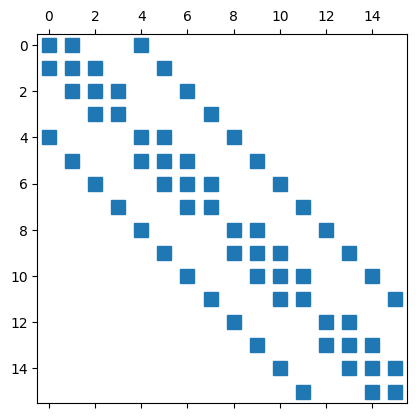

In [460]:
import scipy.sparse as sparse
n = 4
epsilon = 1e-1
A = sparse.lil_matrix((n*n, n*n))

for row in range(n):
    for col in range(n):
        A[row*n+col,row*n+col] += 1
        if row != n-1:
            A[row*n+col,row*n+col+n] = -epsilon
            A[row*n+col,row*n+col] += epsilon
        if col != n-1:
            A[row*n+col,row*n+col+1] = -epsilon
            A[row*n+col,row*n+col] += epsilon
        if row != 0:
            A[row*n+col,row*n+col-n] = -epsilon
            A[row*n+col,row*n+col] += epsilon
        if col != 0:
            A[row*n+col,row*n+col-1] = -epsilon
            A[row*n+col,row*n+col] += epsilon      
plt.spy(A)

In [461]:
print(A.todense())

[[ 1.2 -0.1  0.   0.  -0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [-0.1  1.3 -0.1  0.   0.  -0.1  0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.  -0.1  1.3 -0.1  0.   0.  -0.1  0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.  -0.1  1.2  0.   0.   0.  -0.1  0.   0.   0.   0.   0.   0.
   0.   0. ]
 [-0.1  0.   0.   0.   1.3 -0.1  0.   0.  -0.1  0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.  -0.1  0.   0.  -0.1  1.4 -0.1  0.   0.  -0.1  0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.  -0.1  0.   0.  -0.1  1.4 -0.1  0.   0.  -0.1  0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.  -0.1  0.   0.  -0.1  1.3  0.   0.   0.  -0.1  0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.  -0.1  0.   0.   0.   1.3 -0.1  0.   0.  -0.1  0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.1  0.   0.  -0.1  1.4 -0.1  0.   0.  -0.1
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.1  0.   0.  -0.1  1.4 -0.1  0.   0.
  -0.1  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.1  0.   0.  -0.1  1.3  0.   0.
   0

3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [481]:
n =3
epsilon = -0.1

def A_efficiently(n:int, epsilon):
    #stands for side diagonals
    upper_diag_r = np.arange(n*n-n)
    upper_diag_c = np.arange(n,n*n)
    lower_diag_r = np.arange(n,n*n)
    lower_diag_c = np.arange(n*n-n)
    #stands for higher or lower part of main diag
    upper_main_diag_c = np.arange(1,n*n)
    upper_main_diag_r = np.arange(n*n-1)
    
    upper_main_diag_c =np.delete(upper_main_diag_c,np.arange(n-1,n*n-1,n))
    upper_main_diag_r = np.delete(upper_main_diag_r,np.arange(n-1,n*n-1,n))
    
    lower_main_diag_r = np.arange(1,n*n)
    lower_main_diag_c = np.arange(n*n-1)

    lower_main_diag_r = np.delete(lower_main_diag_r,np.arange(n-1,n*n-1,n))
    lower_main_diag_c = np.delete(lower_main_diag_c,np.arange(n-1,n*n-1,n))
    
    data_side =  np.ones(4*(n*n-n))*epsilon
    
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    data_diag[::n] -= epsilon
    data_diag[n-1::n] -= epsilon
    data_diag[:n] -= epsilon
    data_diag[-n:] -= epsilon
    
    row=np.hstack((row_idx_diag,upper_diag_r,lower_diag_r,upper_main_diag_r,lower_main_diag_r))
    col=np.hstack((col_idx_diag,upper_diag_c,lower_diag_c,upper_main_diag_c,lower_main_diag_c))
    data = np.hstack((data_diag,data_side))
    
    A_efficiently = csr_matrix((data,(row,col)))
    return A_efficiently
    """
    print(upper_diag_r,upper_diag_c)
    print(lower_diag_r, lower_diag_c)
    print(upper_main_diag_r,upper_main_diag_c)
    print(lower_main_diag_r,lower_main_diag_c)
    print(len(data_diag))
    """

[[1.2 0.1 0.  0.1 0.  0.  0.  0.  0. ]
 [0.1 1.3 0.1 0.  0.1 0.  0.  0.  0. ]
 [0.  0.1 1.2 0.  0.  0.1 0.  0.  0. ]
 [0.1 0.  0.  1.3 0.1 0.  0.1 0.  0. ]
 [0.  0.1 0.  0.1 1.4 0.1 0.  0.1 0. ]
 [0.  0.  0.1 0.  0.1 1.3 0.  0.  0.1]
 [0.  0.  0.  0.1 0.  0.  1.2 0.1 0. ]
 [0.  0.  0.  0.  0.1 0.  0.1 1.3 0.1]
 [0.  0.  0.  0.  0.  0.1 0.  0.1 1.2]]


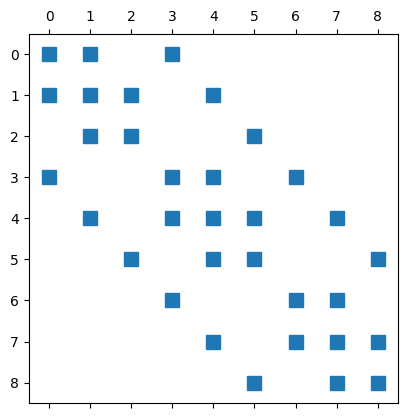

In [482]:
A = A_efficiently(3,0.1)
print(A.todense())
plt.spy(A)

4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

In [425]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)
b = np.zeros((n, n))

b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

[  1  13  25  37  49  61  73  85  97 109 121 133   2  14  26  38  50  62
  74  86  98 110 122 134   3  15  27  39  51  63  75  87  99 111 123 135
   4  16  28  40  52  64  76  88 100 112 124 136   5  17  29  41  53  65
  77  89 101 113 125 137   6  18  30  42  54  66  78  90 102 114 126 138
   7  19  31  43  55  67  79  91 103 115 127 139   8  20  32  44  56  68
  80  92 104 116 128 140   9  21  33  45  57  69  81  93 105 117 129 141
  10  22  34  46  58  70  82  94 106 118 130 142  11  23  35  47  59  71
  83  95 107 119 131 143]


[  0  12  24  36  48  60  72  84  96 108 120 132   1  13  25  37  49  61
  73  85  97 109 121 133   2  14  26  38  50  62  74  86  98 110 122 134
   3  15  27  39  51  63  75  87  99 111 123 135   4  16  28  40  52  64
  76  88 100 112 124 136   5  17  29  41  53  65  77  89 101 113 125 137
   6  18  30  42  54  66  78  90 102 114 126 138   7  19  31  43  55  67
  79  91 103 115 127 139   8  20  32  44  56  68  80  92 104 116 128 140
   9  21  33  45  57  6

TypeError: Cannot construct a dtype from an array

In [426]:
import scipy as sp

# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek


In [ ]:
# TODO - spočtěte a vykreslete vlastní vektory matice A

5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [ ]:
import sympy as sp

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
legendre_5
